In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from numpy import empty, nan, savetxt
from datetime import datetime
import random

from source.spinsystem import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list

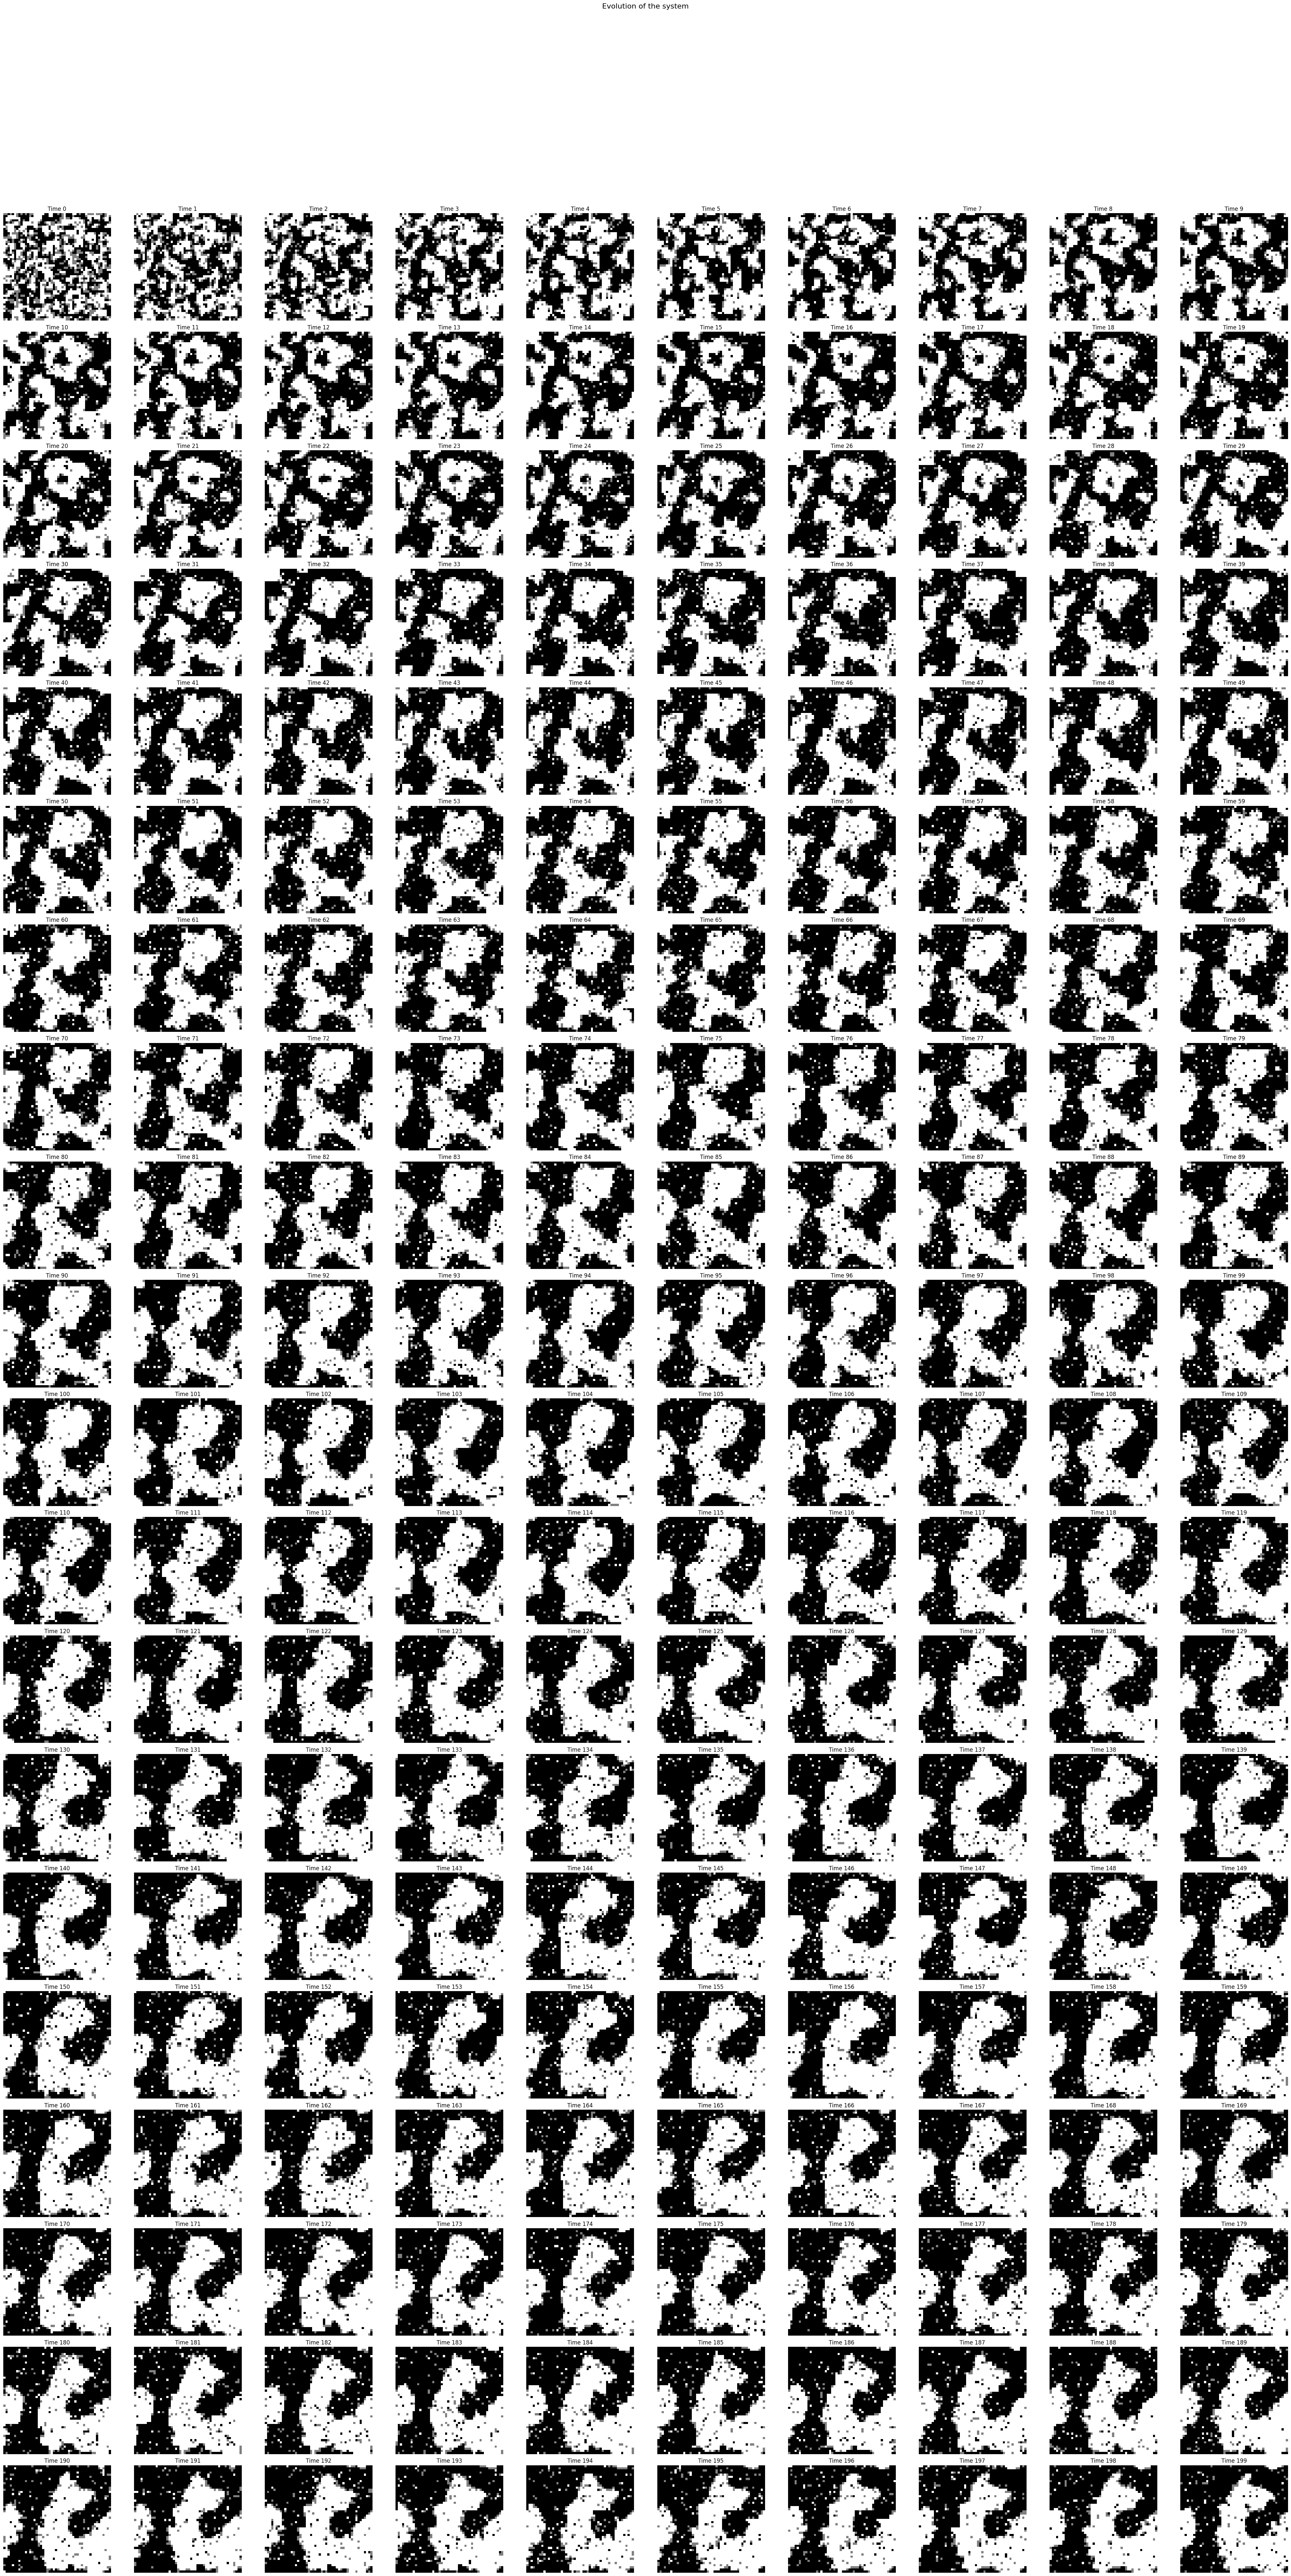

In [5]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def simulate_spin_dynamics(L=50, beta=1.5, alpha=4.0, gamma=1.0, J=1.0, steps=200, turnover_ratio=0.05):
    S = np.random.choice([-1, 0, 1], size=(L, L))
    C = np.random.choice([-1, 1], size=(L, L))
    T = np.random.choice([-1, 1], size=(L, L))
    
    snapshots = []

    def get_neighbors(i, j):
        return [((i-1) % L, j), ((i+1) % L, j), (i, (j-1) % L), (i, (j+1) % L)]

    def local_field(i, j):
        return sum(J * S[x, y] for x, y in get_neighbors(i, j))

    def magnetization():
        return np.mean(S)

    def polarization():
        return np.mean(S**2)

    def energy_levels(h_loc, M, P, Cij, Tij):
        levels = []
        for s in [-1, 0, 1]:
            H = -s * h_loc + alpha * Cij * s * M + gamma * Tij * s**2 * P
            levels.append(-beta * H)
        return softmax(levels)

    for t in range(steps):
        M = magnetization()
        P = polarization()

        for _ in range(L * L):
            i, j = np.random.randint(0, L), np.random.randint(0, L)
            h = local_field(i, j)
            probs = energy_levels(h, M, P, C[i, j], T[i, j])
            S[i, j] = np.random.choice([-1, 0, 1], p=probs)

            

        # --- Turnover: replace 5% of traders ---
        n_turnover = int(turnover_ratio * L * L)
        turnover_indices = np.random.choice(L * L, size=n_turnover, replace=False)
        for idx in turnover_indices:
            i, j = divmod(idx, L)
            S[i, j] = np.random.choice([-1, 0, 1])
            C[i, j] = np.random.choice([-1, 1])
            T[i, j] = np.random.choice([-1, 1])

        snapshots.append(S.copy())

    return snapshots

full_grids = simulate_spin_dynamics()
plot_array_list(full_grids, max_cols=10, timesteps=[i for i in range(len(full_grids))])

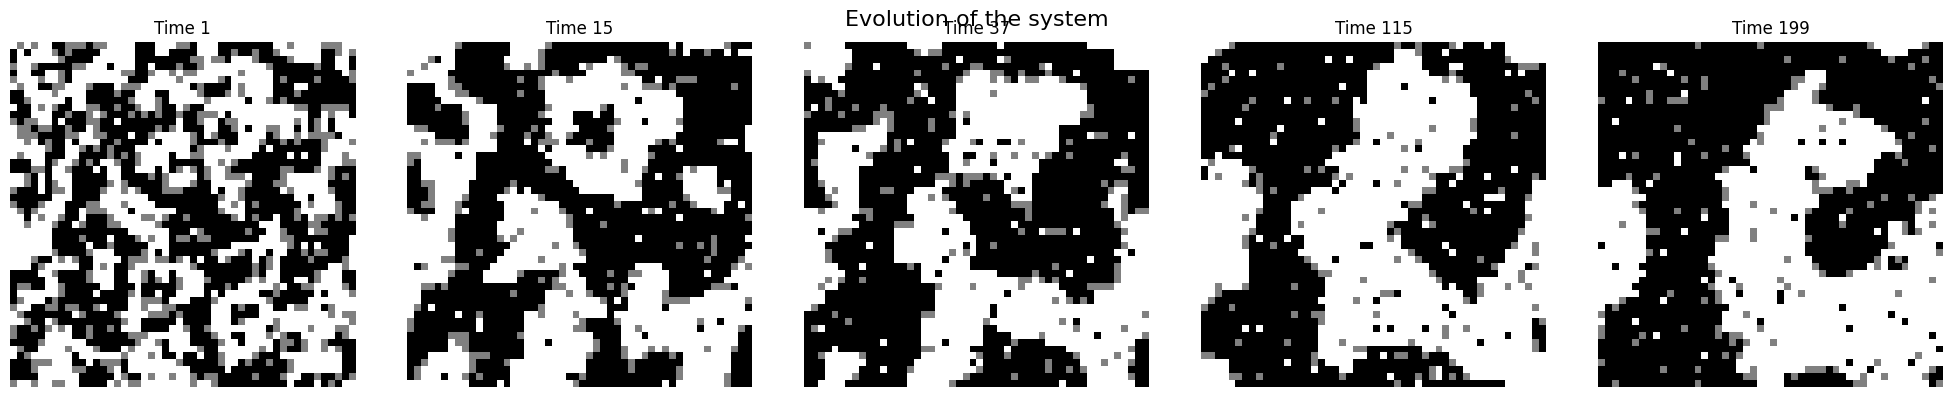

In [6]:
plot_array_list(np.array([full_grids[1], full_grids[15], full_grids[37], full_grids[115], full_grids[199]]), max_cols=5, timesteps=[1,15,37,115, 199])